In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/sample_data/CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
dfcopy=df.copy()

In [4]:
dfcopy.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
dfcopy.shape

(4340, 8)

In [6]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
dfcopy.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
dfcopy.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
#check null values
dfcopy.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [10]:
#check duplicate values
dfcopy.duplicated().sum()

np.int64(763)

In [11]:
#drop dupliacte values
dfcopy=dfcopy.drop_duplicates()

In [12]:
dfcopy.duplicated().sum()

np.int64(0)

**Count Plot**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='fuel', ylabel='count'>

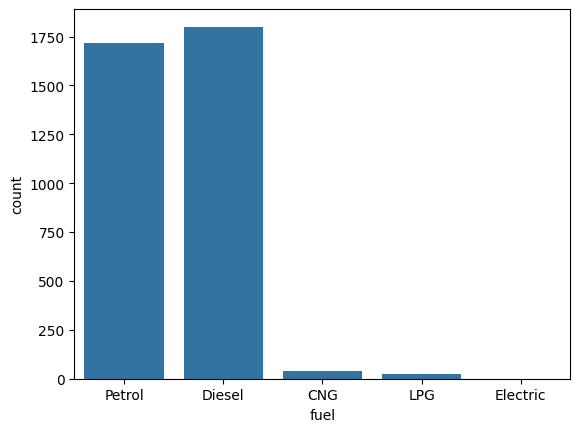

In [14]:
sns.countplot(data=dfcopy,x="fuel")

<Axes: xlabel='seller_type', ylabel='count'>

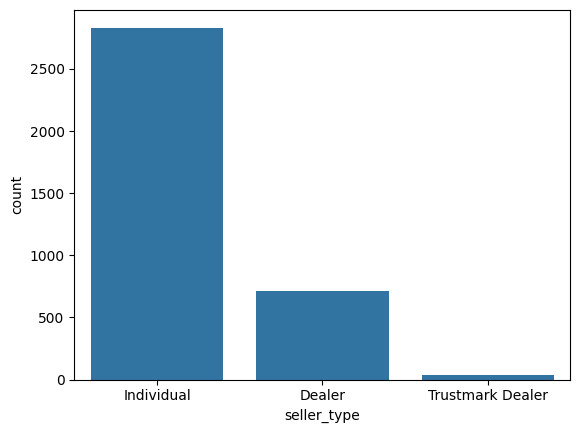

In [15]:
sns.countplot(data=dfcopy,x="seller_type")

<Axes: xlabel='transmission', ylabel='count'>

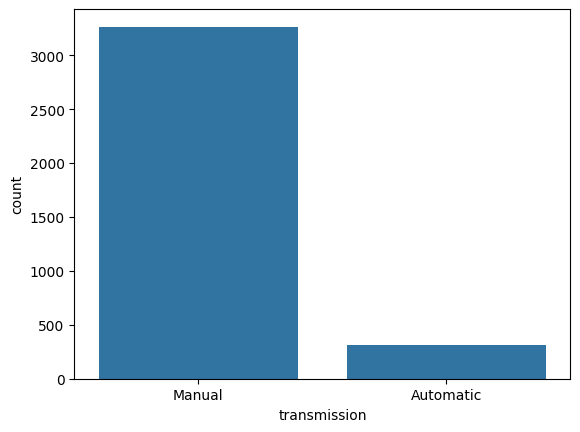

In [16]:
sns.countplot(data=dfcopy,x="transmission")

<Axes: xlabel='owner', ylabel='count'>

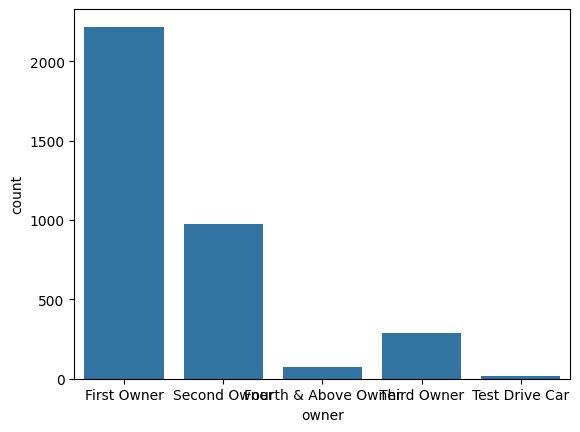

In [17]:
sns.countplot(data=dfcopy,x="owner")

In [18]:
#Handle Categorical Variables
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
dfcopy["fuel"]=le.fit_transform(dfcopy["fuel"])
dfcopy["seller_type"]=le.fit_transform(dfcopy["seller_type"])
dfcopy["transmission"]=le.fit_transform(dfcopy["transmission"])
dfcopy["owner"]=le.fit_transform(dfcopy["owner"])

In [21]:
dfcopy.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [22]:
dfcopy=dfcopy.drop(columns=["name"])

In [23]:
dfcopy.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,4,1,1,0
1,2007,135000,50000,4,1,1,0
2,2012,600000,100000,1,1,1,0
3,2017,250000,46000,4,1,1,0
4,2014,450000,141000,1,1,1,2


In [24]:
dfcopy.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
year,1.000000,0.424260,-0.417490,-0.114040,-0.119385,-0.116692,-0.415832
selling_price,0.424260,1.000000,-0.187359,-0.261979,-0.153182,-0.486269,-0.213130
km_driven,-0.417490,-0.187359,1.000000,-0.297611,0.115357,0.101387,0.290991
fuel,-0.114040,-0.261979,-0.297611,1.000000,0.031395,0.017071,-0.012783
seller_type,-0.119385,-0.153182,0.115357,0.031395,1.000000,0.125991,0.176003
transmission,-0.116692,-0.486269,0.101387,0.017071,0.125991,1.000000,0.060078
owner,-0.415832,-0.213130,0.290991,-0.012783,0.176003,0.060078,1.000000


<Axes: >

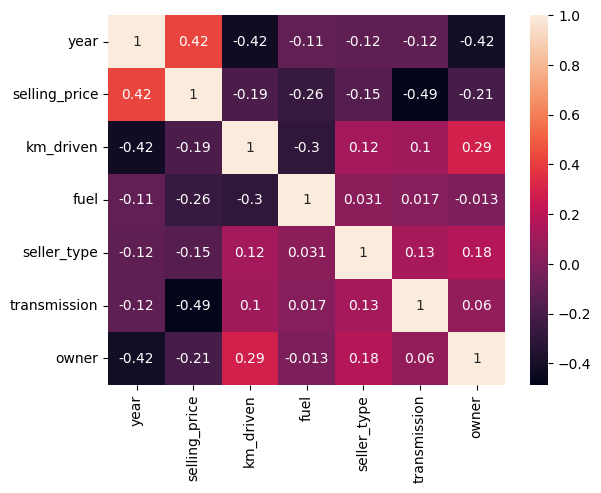

In [25]:
sns.heatmap(dfcopy.corr(),annot=True)

**Train Test Split**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X=dfcopy.drop(columns=["selling_price"])
y=dfcopy["selling_price"]

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

**Standard Scaler**

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
se=StandardScaler()

In [31]:
X_train_scaled=se.fit_transform(X_train)
X_test_scaled=se.transform(X_test)

In [32]:
X_train_scaled.shape

(2861, 6)

In [33]:
y_test.shape

(716,)

**Model Building**

**Linear Regression**

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
le=LinearRegression()

In [36]:
le.fit(X_train_scaled,y_train)

LinearRegression()

In [37]:
y_pred1=le.predict(X_test_scaled)

**Model Evaluation**

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [39]:
print("mean absolute error",mean_absolute_error(y_test,y_pred1))
print("mean squared error",mean_squared_error(y_test,y_pred1))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("r2 score",r2_score(y_test,y_pred1))

mean absolute error 214867.68274296683
mean squared error 188270947804.85214
root mean squared error 433902.00253611663
r2 score 0.383505327879464


**Cross Validation Score**

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
scores=cross_val_score(le,X_train_scaled,y_train,cv=5)
print(scores)
print(scores.mean())

[0.32226433 0.49737317 0.4842052  0.35893708 0.47391755]
0.42733946642209036


**Random Forest Regressor**

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
re=RandomForestRegressor()

In [44]:
re.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
y_pred2=re.predict(X_test)

In [46]:
print("mean absolute error",mean_absolute_error(y_test,y_pred2))
print("mean squared error",mean_squared_error(y_test,y_pred2))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred2)))
print("r2 score",r2_score(y_test,y_pred2))

mean absolute error 204435.197964015
mean squared error 176109127804.24612
root mean squared error 419653.58071181295
r2 score 0.4233293013659849


**Cross Validation Score**

In [47]:
scores=cross_val_score(re,X_train,y_train,cv=5)
print(scores)
print(scores.mean())

[0.37637988 0.48705275 0.42378828 0.38969892 0.41748722]
0.4188814094111457


**Hyperparameter Tuning using Grid Search CV**

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid={
    'n_estimators':[100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search=GridSearchCV(estimator=re, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [50]:
print("Best parameters found:", grid_search.best_params_)
print("Best score achieved:", grid_search.best_score_)

Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400}
Best score achieved: 0.5016955859407929


**Xgb Regressor**

In [51]:
from xgboost import XGBRegressor

In [52]:
xgb=XGBRegressor()

In [53]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
y_pred3=xgb.predict(X_test)

In [55]:
print("mean absolute error",mean_absolute_error(y_test,y_pred3))
print("mean squared error",mean_squared_error(y_test,y_pred3))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred3)))
print("r2 score",r2_score(y_test,y_pred3))

mean absolute error 201208.0625
mean squared error 187165229056.0
root mean squared error 432625.9690032488
r2 score 0.38712602853775024
